**Import all necessary Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
import statsmodels.api as sm
df_airline = pd.read_csv('/content/AirPassengers.csv')

In [2]:

df_airline.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df_airline.duplicated().sum()

0

In [4]:
#check for missing values
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
#convert the date column to dateline format
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [6]:
#convert dataset as index
df_airline.set_index('Month', inplace=True)

In [7]:
#check the first five lines
df_airline.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

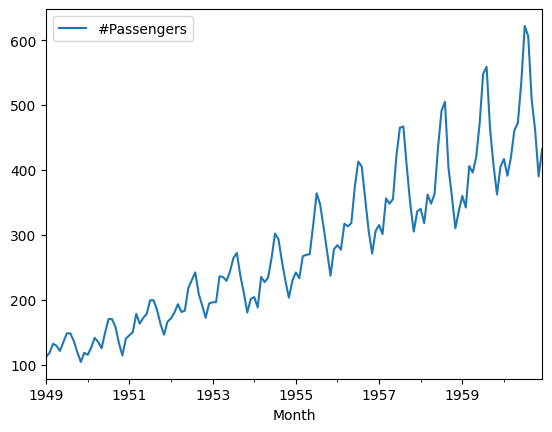

In [8]:
#plot the data on a graph
df_airline.plot()

In [9]:
#performing ADfuller test
from statsmodels.tsa.stattools import adfuller


In [10]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistic: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and it's stationary")
  else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
# passing first column to the ADfuller test function
#passing the first column to the adfuller test function
adf_test(df_airline['#Passengers'])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
#perform deferencing
df_airline['Passengers First Difference']=df_airline['#Passengers']-df_airline['#Passengers'].shift(1)

In [13]:
df_airline.head(5)

,#Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [14]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
#performing second deferencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [16]:
df_airline.head(5)

,#Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [17]:
### 12 months 
## Use  Differencing Techniques
df_airline['Passengers 12 Difference']=df_airline['#Passengers']-df_airline['#Passengers'].shift(12)

In [18]:
df_airline.head(15)

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [19]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistic: -3.383020726492481
p-value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and it's stationary


In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Axes: xlabel='Month'>

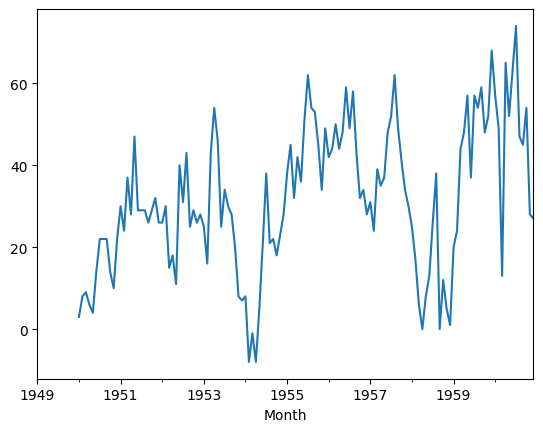

In [21]:
df_airline['Passengers 12 Difference'].plot()

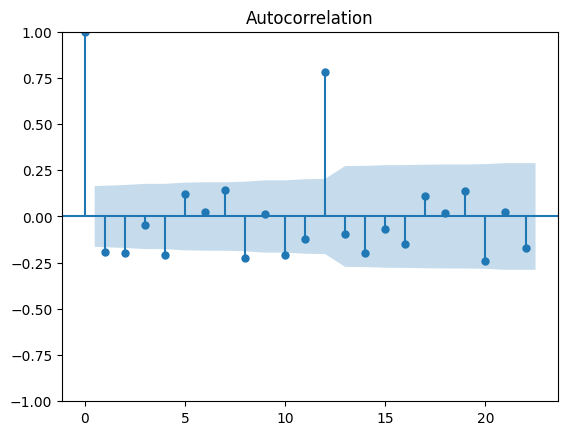

In [22]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


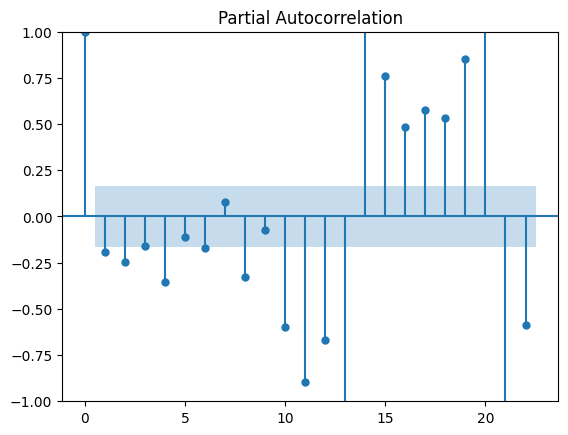

In [23]:
pacf2=plot_pacf(df_airline['Passengers Second Difference'].dropna())

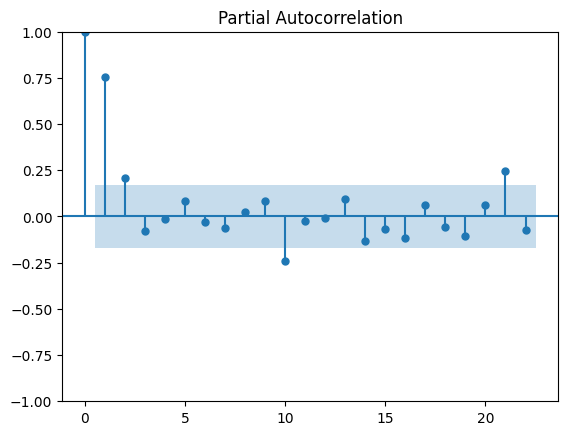

In [24]:
pacf1=plot_pacf(df_airline['Passengers 12 Difference'].dropna())

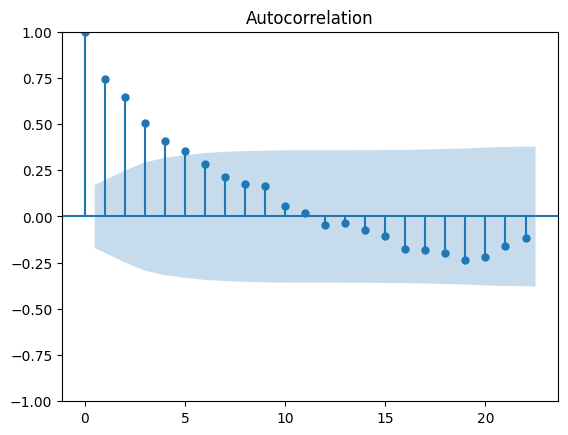

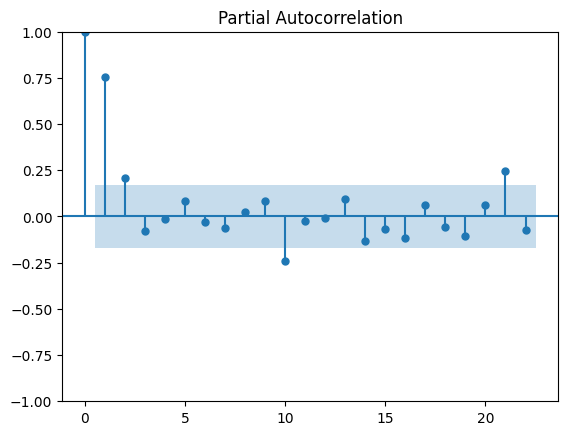

In [25]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [26]:
### split the dataset to train and test data
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [27]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [28]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [29]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api

In [30]:
model_ARIMA=statsmodels.tsa.arima.model.ARIMA(train_data['#Passengers'],order=(5,2,0))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
model_Arima_fit=model_ARIMA.fit()

In [32]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -370.670
Date:                Fri, 21 Apr 2023   AIC                            753.340
Time:                        11:30:48   BIC                            767.780
Sample:                    01-01-1949   HQIC                           759.138
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5031      0.127     -3.952      0.000      -0.753      -0.254
ar.L2         -0.5552      0.131     -4.227      0.000      -0.813      -0.298
ar.L3         -0.4064      0.096     -4.233      0.000      -0.595      -0.218
ar.L4         -0.4906      0.110     -4.444      0.000      -0.707      -0.274
ar.L5         -0.2310      0.110     -2.102      0.036      -0.446      -0.016
sigma2       486.5459     85.172      5.712      0.000     319.611     653.480
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.80   Prob(JB):                         0.54
Heteroskedasticity (H):               3.96   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [34]:
#Generate a forecast 
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred

<Axes: ylabel='Density'>

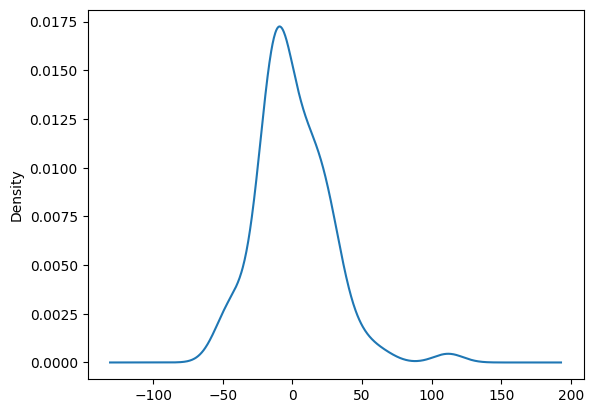

In [35]:
model_Arima_fit.resid.plot(kind='kde')

In [36]:
test_data['Predicted_ARIMA']=pred

<ipython-input-36-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

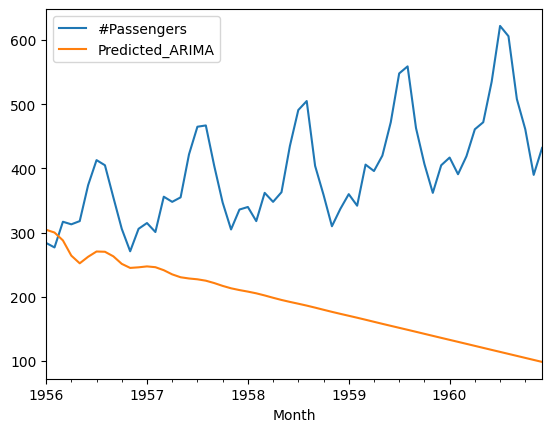

In [37]:
test_data[['#Passengers','Predicted_ARIMA']].plot()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


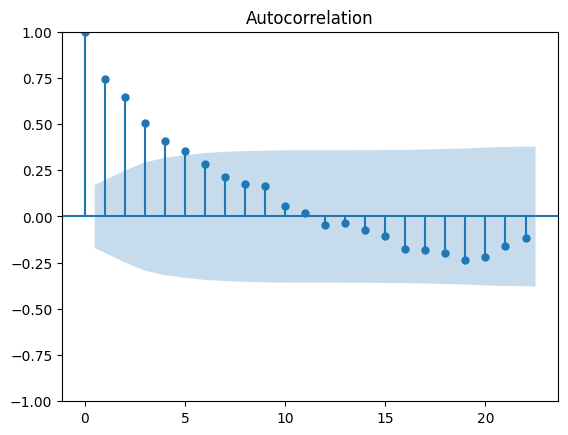

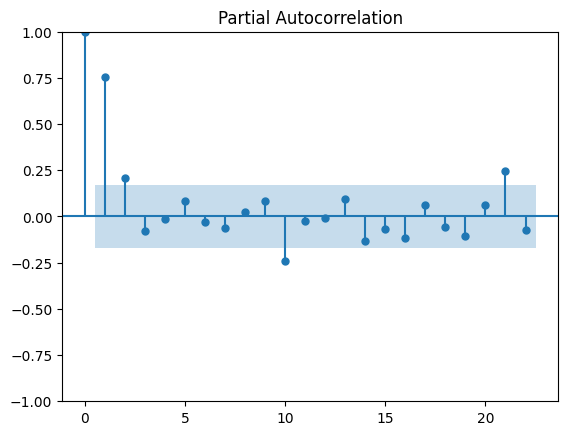

In [38]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [39]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [40]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Fri, 21 Apr 2023   AIC                            548.481
Time:                                     11:30:52   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
test_data.tail()

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,111.199171
1960-09-01,508,-98.0,-82.0,45.0,108.075563
1960-10-01,461,-47.0,51.0,54.0,104.947316
1960-11-01,390,-71.0,-24.0,28.0,101.818514
1960-12-01,432,42.0,113.0,27.0,98.692629


In [44]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [45]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

<Axes: xlabel='Month'>

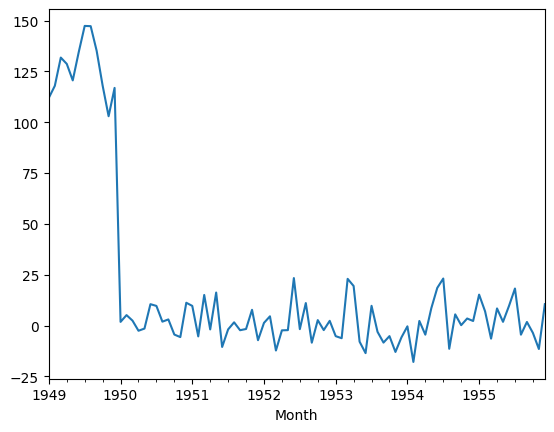

In [46]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

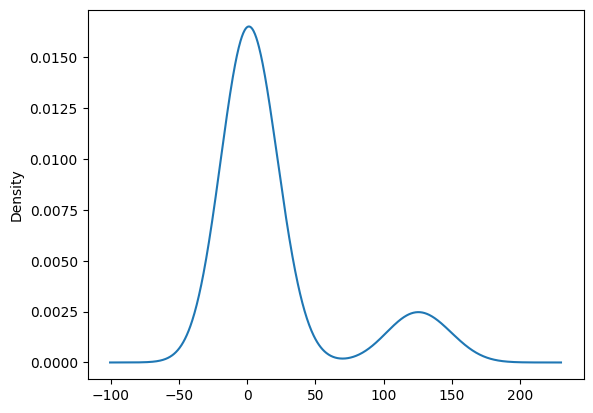

In [47]:
model_SARIMA_fit.resid.plot(kind='kde')

In [50]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
pred_sarima =model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)

In [56]:
residual_sari=test_data['#Passengers']-pred_sarima

In [57]:
test_data['Prediction_SARIMA']=pred_sarima

<ipython-input-57-2cf0d057dd0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction_SARIMA']=pred_sarima


In [58]:
pred_sarima = test_data['Prediction_SARIMA']

<Axes: xlabel='Month'>

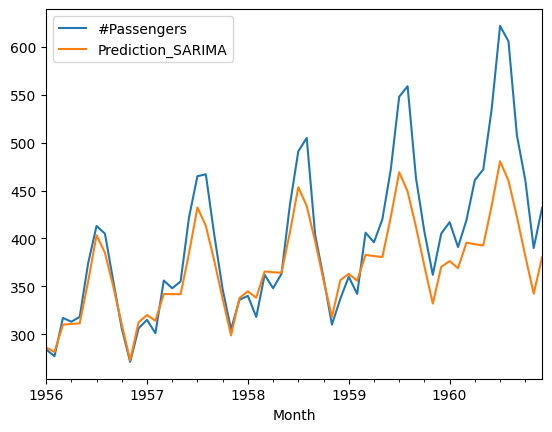

In [60]:
test_data[['#Passengers','Prediction_SARIMA']].plot()